In [1]:
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [42]:
def calc_co2(room_size, room_stars, fuel):
    '''This function is to calculate the amount of CO2 emitted to
        run the hotel room for five times 24h = 120h, based on 
        room_size: room size in m^2, scalar
        room_stars: the number of stars of the Hotel 3, 4, 5 are 
                    possible values, integer
        fuel: which is the primary fuel to produce energy, possible
              values are : ['Coal (anthracite)', 'Coal (bituminous)', 
              'Coal (lignite)', 'Coal (subbituminous)', 'Diesel', 
              'Gasoline', 'Propane', 'Natural gas'], string
    '''
    CO2_per_BTU =  {'Coal (anthracite)': 228.6 * u.imperial.lb / 1e6 / u.imperial.BTU, 
                    'Coal (bituminous)': 205.7 * u.imperial.lb / 1e6 / u.imperial.BTU,
                    'Coal (lignite)': 215.4 * u.imperial.lb / 1e6 / u.imperial.BTU,
                    'Coal (subbituminous)': 214.3 * u.imperial.lb / 1e6 / u.imperial.BTU,
                    'Diesel': 161.3 * u.imperial.lb / 1e6 / u.imperial.BTU,
                    'Gasoline': 157.2 * u.imperial.lb / 1e6 / u.imperial.BTU,
                    'Propane': 139.0 * u.imperial.lb / 1e6 / u.imperial.BTU,
                    'Natural gas': 117.0 * u.imperial.lb / 1e6 / u.imperial.BTU}
    # energy bill per year for hotels in singapore
    kwh_per_sqm = {3: 215.7 * u.kW * u.h / u.m / u.m,
                   4: 234.8  * u.kW * u.h / u.m / u.m, 
                   5: 279.8 * u.kW * u.h / u.m / u.m}
    # for five nights --> factor od 5/365
    energy_tot = kwh_per_sqm[room_stars] * 5./365. * room_size * u.m * u.m
    print(len(energy_tot))
    co2_tot = CO2_per_BTU[fuel] * energy_tot
    co2_tot_kg = co2_tot.to(u.kg)
    return co2_tot_kg

In [43]:
room_size = np.arange(20, 60, 1.)
co2_tot_3stars = calc_co2(room_size, 3, 'Gasoline')
co2_tot_4stars = calc_co2(room_size, 4, 'Gasoline')
co2_tot_5stars = calc_co2(room_size, 5, 'Gasoline')

40
40
40


Text(0.5, 0, 'room size [m$^2$]')

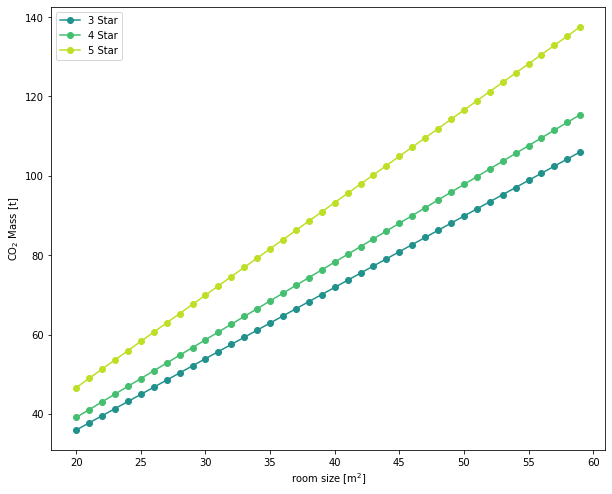

In [40]:
fig = plt.figure(figsize=(10,8.0))
ax = fig.add_axes([0.17, 0.17, 0.77, 0.77])
ax.plot(room_size, co2_tot_3stars * 2500 * 1e-3, marker='o', color=mpl.cm.viridis(0.5), 
        label='3 Star')
ax.plot(room_size, co2_tot_4stars * 2500 * 1e-3, marker='o', color=mpl.cm.viridis(0.7), 
        label='4 Star')
ax.plot(room_size, co2_tot_5stars * 2500 * 1e-3, marker='o', color=mpl.cm.viridis(0.9), 
        label='5 Star')
ax.legend(loc=2)
ax.set_ylabel('CO$_{2}$ Mass [t]')
ax.set_xlabel('room size [m$^2$]')

40
40
40


Text(0.5, 0, 'room size [m$^2$]')

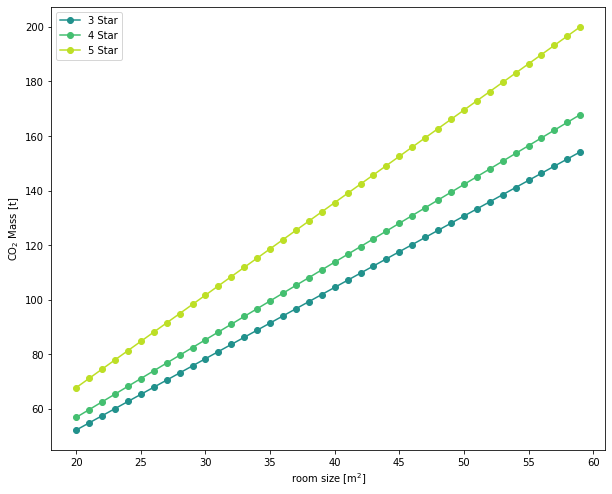

In [41]:
room_size = np.arange(20, 60, 1.)
co2_tot_3stars = calc_co2(room_size, 3, 'Coal (anthracite)')
co2_tot_4stars = calc_co2(room_size, 4, 'Coal (anthracite)')
co2_tot_5stars = calc_co2(room_size, 5, 'Coal (anthracite)')
fig = plt.figure(figsize=(10,8.0))
ax = fig.add_axes([0.17, 0.17, 0.77, 0.77])
ax.plot(room_size, co2_tot_3stars * 2500 * 1e-3, marker='o', color=mpl.cm.viridis(0.5), 
        label='3 Star')
ax.plot(room_size, co2_tot_4stars * 2500 * 1e-3, marker='o', color=mpl.cm.viridis(0.7), 
        label='4 Star')
ax.plot(room_size, co2_tot_5stars * 2500 * 1e-3, marker='o', color=mpl.cm.viridis(0.9), 
        label='5 Star')
ax.legend(loc=2)
ax.set_ylabel('CO$_{2}$ Mass [t]')
ax.set_xlabel('room size [m$^2$]')